# Simulating a GARCH (1,1) Process


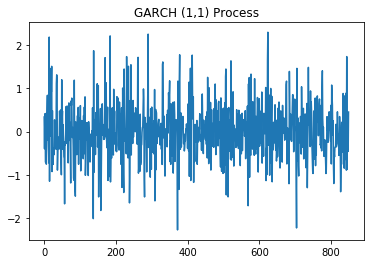

In [10]:
import scipy as sp
from matplotlib.pyplot import *

sp.random.seed(12345)
v = 850 # number of observations
v1 = 150 # need to drop the first several observations
v2 = v + v1
alpha = (0.15, 0.25) # GARCH(1,1) coefficients alpha0 and alpha1
beta = 0.2
# Set up errors as a normal distribution
errors = sp.random.normal(0,1,v2)
# Set up the array for the time series process with length equal to the observations v2
t1 = sp.zeros(v2)
# Specify the first position of the process as a normal (0, unconditional variance of the GARCH process) 
t1[0] = sp.random.normal(0,sp.sqrt(alpha[0]/(1-alpha[1])),1)

# For each time step 
for i in range(1,v2,1):
    t1[i] = errors[i]*sp.sqrt(alpha[0]+alpha[1]*errors[i-1]**2+beta*t1[i-1]**2)
    
y = t1[v1-1:-1] # drop the first n1 observations
title("GARCH (1,1) Process")
x = range(v)
plot(x,y)